# Additional Work

## Preliminaries

#### Import Libraries

In [1]:
# Data Management
import pandas as pd
import numpy as np
import math

# Loading Models
import pickle

# Statistical Tests
from scipy.stats import chi2_contingency, kstest

# Model Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Model Selection
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import f1_score, accuracy_score

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
pd.options.mode.chained_assignment = None

#### Set Seed for Stochasticity

In [2]:
# Set Random State
SEED = 65163874

## Investigating Transaction Approach
Adapting Data From Elliptic Dataset

#### Import Data

In [3]:
ell_classes = pd.read_csv("data/3-additional/elliptic_txs_classes.csv", header=0)
ell_feats = pd.read_csv("data/3-additional/elliptic_txs_features.csv", header=None)
ell_feats = ell_feats.rename(columns={0:"txId"})

#### Merge Dataframes

In [4]:
elliptic_df = pd.merge(ell_classes, ell_feats, on="txId")

#### Rename Columns

In [5]:
cols = ['txId', 'class'] + \
           ["Local_feature_" + str(ii+1) for ii in range(94)] + \
           ["Aggregate_feature_" + str(ii+1) for ii in range(72)]

elliptic_df.columns = cols
elliptic_df

,txId,class,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,unknown,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,unknown,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,unknown,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,unknown,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,158577750,unknown,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,158375402,1,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,158654197,unknown,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


#### Re-Work Classes

In [6]:
# Drop Unknown
elliptic_df = elliptic_df.drop(elliptic_df[elliptic_df["class"] == "unknown"].index)

# Rename to 0 and 1
elliptic_df['class'] = [0 if x == "2" else 1 for x in elliptic_df['class']]

# Show Result
elliptic_df['class'].value_counts()

0    42019
1     4545
Name: class, dtype: int64

#### Model Implementation

In [7]:
# Split Target/Features
x = elliptic_df.drop(['class', 'txId'], axis=1)
y = elliptic_df["class"]

In [8]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=SEED)

In [9]:
# Fit Model
rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=65163874)

In [10]:
y_pred = rf.predict(x_test)

In [11]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# 95% Confidence Interval
ci = 1.96 * math.sqrt((acc * (1 - acc)) / len(y_test))
print("CI: %.3f" % ci)

F1 Score:  0.9336448598130841
Accuracy:  0.9878017352461129
CI: 0.002


## Investigating Bitcoin Wallet Approach
Adapting Data From (P. Nerurkar et al.)

#### Import Data

In [10]:
wallets_df = pd.read_csv("data/3-additional/bitcoin_multiclass.csv", index_col=0).drop(["wallet_id", "wallet_alias"], axis=1)
wallets_df

,label,txs_count,balance,total_received,total_sent,total_life,addresses_count,avg_incoming_tx_per_address,total_incoming_tx,fraction_unique_addr_count,...,Avg_sent,Total_sent,Stdev_sent,Var_sent,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received
1,affiliatemarketing,5492,4.000000e-08,2254,546,99046743.0,2979.0,2.472667,3709,1.843572,...,1.593917,1.394199e+04,31.149792,970.309550,1.000000e-08,2101.642502,0.377491,1.394111e+04,14.809170,219.311502
2,affiliatemarketing,2059,0.000000e+00,1088,12,37276868.0,2023.0,1.030909,1134,1.017795,...,0.416464,1.584644e+03,4.068584,16.553378,8.210000e-06,150.419651,0.571706,1.584197e+03,4.711570,22.198893
3,criminals,500260,1.008293e+03,490517,9243,96190750.0,75369.0,15.321631,1154776,6.637477,...,12.126415,5.005811e+07,199.986308,39994.523422,0.000000e+00,29908.272285,1.723795,5.005672e+07,75.265336,5664.870793
4,cybersec,1049,2.122900e-03,1043,6,15526485.0,35.0,29.971429,1049,29.971429,...,0.988701,3.155935e+03,5.907542,34.899057,6.000000e-06,166.430080,0.017959,3.155103e+03,0.773301,0.597994
5,cybersec,537,1.000000e-04,533,4,16569579.0,22.0,24.318182,535,24.409091,...,0.599080,9.016151e+02,7.658755,58.656523,1.000000e-08,265.079812,0.442322,9.014530e+02,6.441456,41.492354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,donations,3485,1.975823e-02,3344,141,190772268.0,1.0,3344.000000,3344,3485.000000,...,2.109443,2.181164e+04,30.972507,959.296211,1.000000e-08,1360.802456,0.979406,2.181039e+04,20.177778,407.142715
4410,donations,305,5.402020e+00,272,33,290864638.0,5.0,55.200000,276,61.000000,...,3.857979,2.704443e+03,20.709446,428.881135,1.000000e-06,294.990000,1.221899,2.704062e+03,11.204811,125.547786
4510,donations,4871,2.873574e+00,4841,30,230790667.0,1.0,4841.000000,4841,4871.000000,...,2.841630,3.586705e+04,81.078882,6573.785028,1.000000e-08,8491.932331,0.146498,3.586192e+04,18.336868,336.240712
4610,donations,3007,3.473048e+00,2430,577,225795033.0,30.0,87.000000,2610,100.233333,...,3.456313,3.249625e+04,69.395880,4815.788122,1.000000e-08,5406.198440,0.391877,3.681330e+04,20.761066,431.021850


#### Drop Null Values

In [12]:
wallets_df = wallets_df.dropna()
wallets_df

,label,txs_count,balance,total_received,total_sent,total_life,addresses_count,avg_incoming_tx_per_address,total_incoming_tx,fraction_unique_addr_count,...,Avg_sent,Total_sent,Stdev_sent,Var_sent,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received
1,affiliatemarketing,5492,4.000000e-08,2254,546,99046743.0,2979.0,2.472667,3709,1.843572,...,1.593917,1.394199e+04,31.149792,970.309550,1.000000e-08,2101.642502,0.377491,1.394111e+04,14.809170,219.311502
2,affiliatemarketing,2059,0.000000e+00,1088,12,37276868.0,2023.0,1.030909,1134,1.017795,...,0.416464,1.584644e+03,4.068584,16.553378,8.210000e-06,150.419651,0.571706,1.584197e+03,4.711570,22.198893
3,criminals,500260,1.008293e+03,490517,9243,96190750.0,75369.0,15.321631,1154776,6.637477,...,12.126415,5.005811e+07,199.986308,39994.523422,0.000000e+00,29908.272285,1.723795,5.005672e+07,75.265336,5664.870793
4,cybersec,1049,2.122900e-03,1043,6,15526485.0,35.0,29.971429,1049,29.971429,...,0.988701,3.155935e+03,5.907542,34.899057,6.000000e-06,166.430080,0.017959,3.155103e+03,0.773301,0.597994
5,cybersec,537,1.000000e-04,533,4,16569579.0,22.0,24.318182,535,24.409091,...,0.599080,9.016151e+02,7.658755,58.656523,1.000000e-08,265.079812,0.442322,9.014530e+02,6.441456,41.492354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,donations,3485,1.975823e-02,3344,141,190772268.0,1.0,3344.000000,3344,3485.000000,...,2.109443,2.181164e+04,30.972507,959.296211,1.000000e-08,1360.802456,0.979406,2.181039e+04,20.177778,407.142715
4410,donations,305,5.402020e+00,272,33,290864638.0,5.0,55.200000,276,61.000000,...,3.857979,2.704443e+03,20.709446,428.881135,1.000000e-06,294.990000,1.221899,2.704062e+03,11.204811,125.547786
4510,donations,4871,2.873574e+00,4841,30,230790667.0,1.0,4841.000000,4841,4871.000000,...,2.841630,3.586705e+04,81.078882,6573.785028,1.000000e-08,8491.932331,0.146498,3.586192e+04,18.336868,336.240712
4610,donations,3007,3.473048e+00,2430,577,225795033.0,30.0,87.000000,2610,100.233333,...,3.456313,3.249625e+04,69.395880,4815.788122,1.000000e-08,5406.198440,0.391877,3.681330e+04,20.761066,431.021850


#### Check Category Types

In [13]:
wallets_df['label'].value_counts()

Unclassified          1592
exchange                88
sextortionist           57
blackmail               53
mixer                   53
donations               48
gambling                35
ponzi                   28
scams                   23
darkmarket              16
ransomwares             11
trading                  9
wallets                  8
pools                    8
paymentgateway           6
p2plender                6
miner                    3
explorer                 2
affiliatemarketing       2
faucet                   2
cybersec                 2
criminals                1
bomb                     1
microworker              1
laundering               1
videosharing             1
bond                     1
p2pmarket                1
Name: label, dtype: int64

#### Re-Classify

In [14]:
susp = ["sextortionist", "blackmail", "mixer", "ponzi", "scams", "darkmarket", "ransomwares", "criminals", 'laundering', "bomb"]

wallets_df['Class'] = [0 if x not in susp else 1 for x in wallets_df['label']]
wallets_df = wallets_df.drop("label", axis=1)
wallets_df

,txs_count,balance,total_received,total_sent,total_life,addresses_count,avg_incoming_tx_per_address,total_incoming_tx,fraction_unique_addr_count,Min_sent,...,Total_sent,Stdev_sent,Var_sent,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Class
1,5492,4.000000e-08,2254,546,99046743.0,2979.0,2.472667,3709,1.843572,1.000000e-08,...,1.394199e+04,31.149792,970.309550,1.000000e-08,2101.642502,0.377491,1.394111e+04,14.809170,219.311502,0
2,2059,0.000000e+00,1088,12,37276868.0,2023.0,1.030909,1134,1.017795,8.000000e-06,...,1.584644e+03,4.068584,16.553378,8.210000e-06,150.419651,0.571706,1.584197e+03,4.711570,22.198893,0
3,500260,1.008293e+03,490517,9243,96190750.0,75369.0,15.321631,1154776,6.637477,1.000000e-08,...,5.005811e+07,199.986308,39994.523422,0.000000e+00,29908.272285,1.723795,5.005672e+07,75.265336,5664.870793,1
4,1049,2.122900e-03,1043,6,15526485.0,35.0,29.971429,1049,29.971429,6.000000e-06,...,3.155935e+03,5.907542,34.899057,6.000000e-06,166.430080,0.017959,3.155103e+03,0.773301,0.597994,0
5,537,1.000000e-04,533,4,16569579.0,22.0,24.318182,535,24.409091,1.000000e-08,...,9.016151e+02,7.658755,58.656523,1.000000e-08,265.079812,0.442322,9.014530e+02,6.441456,41.492354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,3485,1.975823e-02,3344,141,190772268.0,1.0,3344.000000,3344,3485.000000,1.000000e-08,...,2.181164e+04,30.972507,959.296211,1.000000e-08,1360.802456,0.979406,2.181039e+04,20.177778,407.142715,0
4410,305,5.402020e+00,272,33,290864638.0,5.0,55.200000,276,61.000000,1.000000e-07,...,2.704443e+03,20.709446,428.881135,1.000000e-06,294.990000,1.221899,2.704062e+03,11.204811,125.547786,0
4510,4871,2.873574e+00,4841,30,230790667.0,1.0,4841.000000,4841,4871.000000,1.000000e-08,...,3.586705e+04,81.078882,6573.785028,1.000000e-08,8491.932331,0.146498,3.586192e+04,18.336868,336.240712,0
4610,3007,3.473048e+00,2430,577,225795033.0,30.0,87.000000,2610,100.233333,1.000000e-08,...,3.249625e+04,69.395880,4815.788122,1.000000e-08,5406.198440,0.391877,3.681330e+04,20.761066,431.021850,0


In [15]:
wallets_df['Class'].value_counts()

0    1815
1     244
Name: Class, dtype: int64

#### Number of Stats Tests (for Bonferonni Correction)

In [16]:
# Each Feature Tested for Normality and Correlation
num_tests = (len(wallets_df.keys()) - 1) * 2

#### Define Dataframes

In [17]:
norm_df = pd.DataFrame(columns=["Feature", "Adjusted P-Value"])

In [18]:
corr_df = pd.DataFrame(columns=["Feature", "Coefficient", "Adjusted P-Value"])

#### Numerical Variables

In [19]:
# Check Normality

# Numerical Features
num = [x for x in list(wallets_df.keys()) if x != "Class"]

# Theoretical Normal Distribution
theoretical = np.random.randn(len(wallets_df))

# Conduct KS-Tests
for feat in num:
    theoretical = np.random.randn(len(wallets_df[feat]))
    st, p = kstest(wallets_df[feat], theoretical)
    norm_df.loc[len(norm_df)] = {"Feature": feat, "Statistic": st, "Adjusted P-Value": p * num_tests}

In [20]:
norm_df

,Feature,Adjusted P-Value
0,txs_count,0.000000e+00
1,balance,5.072886e-231
2,total_received,0.000000e+00
3,total_sent,7.711745e-235
4,total_life,0.000000e+00
5,addresses_count,0.000000e+00
6,avg_incoming_tx_per_address,0.000000e+00
7,total_incoming_tx,0.000000e+00
8,fraction_unique_addr_count,0.000000e+00
9,Min_sent,1.195160e-215


In [21]:
# Dichotomise Variables by Median
medians = wallets_df[num].median()
dichotomise = lambda col: (col > medians[col.name]).astype(int)

di_num_df = wallets_df[num].apply(dichotomise, axis=0)
di_num_df

,txs_count,balance,total_received,total_sent,total_life,addresses_count,avg_incoming_tx_per_address,total_incoming_tx,fraction_unique_addr_count,Min_sent,...,Avg_sent,Total_sent,Stdev_sent,Var_sent,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received
1,1,0,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
2,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,0,1,0,1,1,1
3,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
5,1,0,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
4410,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
4510,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
4610,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1


In [22]:
# Get Strength of Correlation
for feat in num:

    # Check Association
    cross_tab = pd.crosstab(wallets_df["Class"], di_num_df[feat])
    chi2, p, _, _ = chi2_contingency(cross_tab)

    # Calculate Phi Coefficient
    n = cross_tab.sum().sum()
    phi = np.sqrt(chi2 / (n*(min(cross_tab.shape)-1)))

    # Insert New Row
    corr_df.loc[len(corr_df)] = {"Feature": feat, "Coefficient": phi, "Adjusted P-Value": p * num_tests}

#### Results

In [24]:
corr_df

,Feature,Coefficient,Adjusted P-Value
0,txs_count,0.243180,1.093292e-26
1,balance,0.178641,2.196268e-14
2,total_received,0.219041,1.180168e-21
3,total_sent,0.217939,1.946826e-21
4,total_life,0.257137,7.811981e-30
5,addresses_count,0.193169,7.825710e-17
6,avg_incoming_tx_per_address,0.271582,2.848554e-33
7,total_incoming_tx,0.217905,1.977325e-21
8,fraction_unique_addr_count,0.133621,5.603218e-08
9,Min_sent,0.168868,7.654311e-13


In [25]:
def plot_coeffs(title, data):
    # Create Plot
    ax = sns.barplot(x='Feature', y='Coefficient', data=data, palette=data['Color'])

    # Set Labels
    ax.set_title(title)
    ax.set_xlabel("Feature Name")
    ax.set_ylabel("Coefficient")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Legend
    legend_elements = [
        plt.Line2D([0], [0], color='green', marker='s', linestyle='', markersize=10, label='Significant'),
        plt.Line2D([0], [0], color='red', marker='s', linestyle='', markersize=10, label='Not Significant')
    ]

    plt.legend(handles=legend_elements)

    # Save Image
    plt.savefig("figures/add/" + title + ".pdf", format="pdf", bbox_inches="tight")

    # Show Plot
    plt.show()

In [26]:
# Prep For Plot

# Get Column Color
corr_df['Significant'] = [True if x < 0.05 else False for x in corr_df['Adjusted P-Value']]
corr_df['Color'] = corr_df['Significant'].map({True: "green", False: "red"})

# Sort Ascending Coefficient
corr_df = corr_df.sort_values('Coefficient')

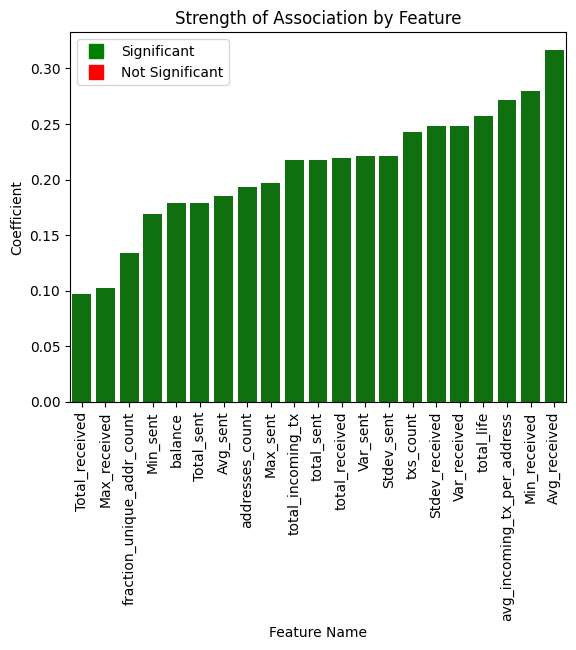

In [27]:
# All Features
plot_coeffs("Strength of Association by Feature", corr_df)

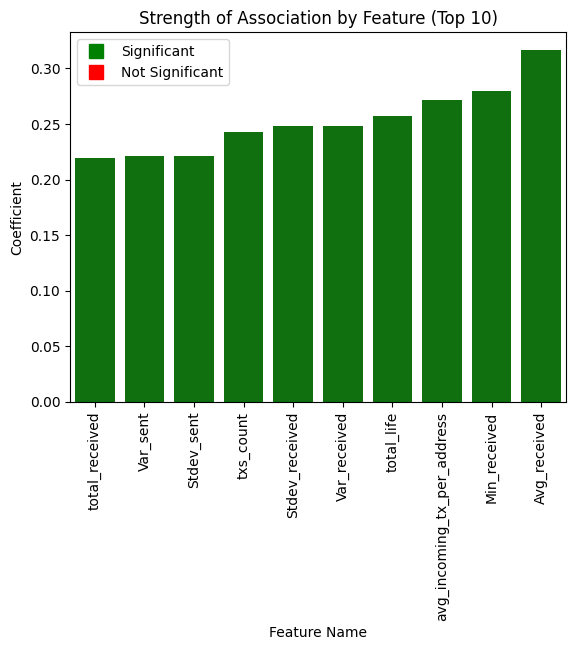

In [28]:
# Top 10
plot_coeffs("Strength of Association by Feature (Top 10)", corr_df.tail(10))

#### Model Implementation

In [33]:
# Split Target/Features
x = wallets_df.drop(['Class'], axis=1)
y = wallets_df["Class"]

In [34]:
# Get Features List
chosen = list(corr_df.loc[(corr_df["Coefficient"] > 0.2)]["Feature"])
x = x[chosen]
x

,total_incoming_tx,total_sent,total_received,Var_sent,Stdev_sent,txs_count,Stdev_received,Var_received,total_life,avg_incoming_tx_per_address,Min_received,Avg_received
1,3709,546,2254,970.309550,31.149792,5492,14.809170,219.311502,99046743.0,2.472667,1.000000e-08,0.377491
2,1134,12,1088,16.553378,4.068584,2059,4.711570,22.198893,37276868.0,1.030909,8.210000e-06,0.571706
3,1154776,9243,490517,39994.523422,199.986308,500260,75.265336,5664.870793,96190750.0,15.321631,0.000000e+00,1.723795
4,1049,6,1043,34.899057,5.907542,1049,0.773301,0.597994,15526485.0,29.971429,6.000000e-06,0.017959
5,535,4,533,58.656523,7.658755,537,6.441456,41.492354,16569579.0,24.318182,1.000000e-08,0.442322
...,...,...,...,...,...,...,...,...,...,...,...,...
4310,3344,141,3344,959.296211,30.972507,3485,20.177778,407.142715,190772268.0,3344.000000,1.000000e-08,0.979406
4410,276,33,272,428.881135,20.709446,305,11.204811,125.547786,290864638.0,55.200000,1.000000e-06,1.221899
4510,4841,30,4841,6573.785028,81.078882,4871,18.336868,336.240712,230790667.0,4841.000000,1.000000e-08,0.146498
4610,2610,577,2430,4815.788122,69.395880,3007,20.761066,431.021850,225795033.0,87.000000,1.000000e-08,0.391877


In [35]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=SEED)

In [36]:
def optimise(x_tr, y_tr):
    # Define Parameter Grid
    rf_grid = {
        "n_estimators": [1, 25, 50, 75, 100],
        "criterion": ['gini', 'entropy', 'log_loss'],
        "max_depth": [1, 10, 100, 1000, None],
        "min_samples_split": [2, 10, 20, 30, 40],
        "min_samples_leaf": [1, 5, 10, 20],
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False],
        "random_state":[SEED]
    }

    # Perform Cross Validation
    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

    rf_cv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=splitter,
                         n_jobs=-1,
                         scoring='accuracy',
                         refit=True)

    # Grid Search
    return rf_cv.fit(x_tr, y_tr)

In [37]:
# Perform Optimisation
res = optimise(x_train, y_train)

#### Model Evaluation

In [38]:
# Get Best Model
rf = res.best_estimator_

In [39]:
# Make Predictions
y_pred = rf.predict(x_test)

In [40]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# 95% Confidence Interval
ci = 1.96 * math.sqrt((acc * (1 - acc)) / len(y_test))
print("CI: %.3f" % ci)

F1 Score:  0.3376623376623376
Accuracy:  0.9009708737864077
CI: 0.026


## Comparison of Datasets

In [41]:
# Define Dataframe
recs = [{"Dataset": "Elliptic", "Model Accuracy": 0.988, "95%_CI": 0.002},
        {"Dataset": "Ethereum", "Model Accuracy": 0.982, "95%_CI": 0.010},
        {"Dataset": "BitcoinWallet", "Model Accuracy": 0.901, "95%_CI": 0.026},
        {"Dataset": "BitcoinAddr", "Model Accuracy": 0.738, "95%_CI": 0.032}]

comp_df = pd.DataFrame.from_dict(recs)

In [42]:
comp_df['Model Accuracy'] = comp_df['Model Accuracy'] * 100
comp_df['95%_CI'] = comp_df['95%_CI'] * 100
comp_df

,Dataset,Model Accuracy,95%_CI
0,Elliptic,98.8,0.2
1,Ethereum,98.2,1.0
2,BitcoinWallet,90.1,2.6
3,BitcoinAddr,73.8,3.2


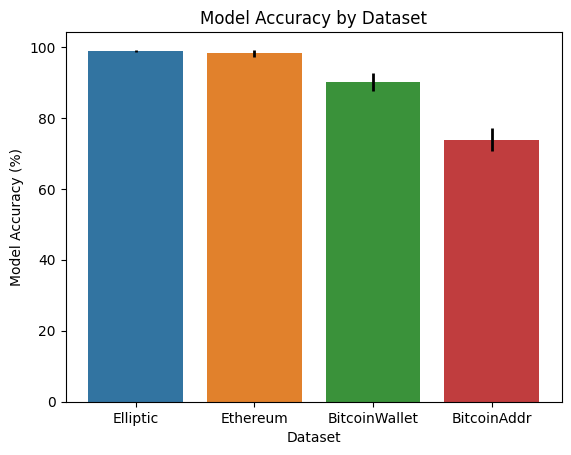

In [43]:
pl = sns.barplot(x="Dataset", y="Model Accuracy", data=comp_df)
pl.errorbar(data=comp_df, x='Dataset', y='Model Accuracy', yerr='95%_CI', ls='', lw=2, color="black")
plt.title("Model Accuracy by Dataset")
plt.ylabel("Dataset")
plt.ylabel("Model Accuracy (%)")
plt.savefig("figures/add/" + "Model Accuracy by Dataset" + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

## Application of Bitcoin Address Model

#### Import Data

In [3]:
anal_df = pd.read_csv("data/2-btc/address_data/anal_data.csv", index_col=0)
anal_df

,Address,Total_Rec,Total_Sent,Balance,N_TX,N_Rec,N_Sent,Avg_Rec,Min_Rec,Max_Rec,...,Time_Between_FirstLast,Avg_Delta_Rec,Min_Delta_Rec,Max_Delta_Rec,Avg_Delta_Sent,Min_Delta_Sent,Max_Delta_Sent,Unique_Rec,Unique_Sent,Month
0,3N8So3mx41hxDHW7SgNyQYB24j7sG9sPg2,110316332,110316332,0,2,1,1,1.103163e+08,110316332,110316332,...,1531,0.000000e+00,0,0,0.000000e+00,0,0,1,3,1
1,bc1q887cel7trdh8l3en27uwdj3jkrdhq3c6eg8vd7,72190719,72154023,36696,172,100,105,4.252604e+05,1995,2213872,...,8339683,8.423922e+04,237,1453782,8.010370e+04,0,2140211,34,1158,1
2,3BEun88LDToCHYJ9rGbEkk8kS1RJsura8s,517733738,517733738,0,44,22,22,2.353335e+07,5877000,53682999,...,41585391,1.947019e+06,186747,7425865,1.979667e+06,167500,6769371,168,61,1
3,34AQFUjJFmsXYk75xJjtQYSB8ipWiaPZKQ,972773,972773,0,2,1,1,9.727730e+05,972773,972773,...,528461,0.000000e+00,0,0,0.000000e+00,0,0,2,3,1
4,bc1q2eg28za6wlj5qgu6jukjhwmvgzwshruf2r7h8k,118771,118771,0,2,1,1,1.187710e+05,118771,118771,...,118418,0.000000e+00,0,0,0.000000e+00,0,0,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,bc1qj7592rkmxcsd9nfaeqfwqcu5v25xtf9xmjaept,65376208,65376208,0,225,67,68,6.325581e+05,25432,2174720,...,9114365,1.339661e+05,87,1420744,1.360353e+05,0,1476941,62,2373,9
11996,bc1qza62ajghs9z9c327jm98cjlf0n0uazvcz25346,2574192374,2574192374,0,9678,97,188,3.122955e+05,24366,681289,...,174783,1.766792e+03,0,54654,3.927701e+02,0,64933,617,210,11
11997,bc1q5e0zwp0a3nvuekpzqfna2wane8xmlw57r549m5,1291500,1291500,0,2,1,1,1.291500e+06,1291500,1291500,...,32,0.000000e+00,0,0,0.000000e+00,0,0,1,3,11
11998,bc1qgkj8gl6czqrntffxy7nqqtzrce99pe4lcpu3nn,160523845,160523845,0,243,92,93,4.957068e+05,6879,6299409,...,11747544,1.278162e+05,91,1411702,1.276890e+05,0,1197827,75,6999,11


#### Extract Additional Features

In [4]:
# Ratio of Sent to Received Amounts
anal_df['R_Sent_Rec_Amount'] = anal_df['Total_Sent'] / anal_df['Total_Rec']

# Ratio of Sent to Recieved Addresses
anal_df['R_Sent_Rec_Addr'] = anal_df['Unique_Sent'] / anal_df['Unique_Rec']

# Total Addresses Interacted With
anal_df['Total_Interacted'] = anal_df['Unique_Sent'] + anal_df['Unique_Rec']

# Ratio of Average Amount to Total Amount
anal_df['R_Avg_Total_Rec'] = anal_df['Avg_Rec'] / anal_df['Total_Rec']

# Ratio of Sent to Received TXs
anal_df['R_N_Sent_Rec'] = anal_df['N_Sent'] / anal_df['N_Rec']

# Reused (Bool)
anal_df['Reused'] = np.where(anal_df['N_TX'] > 2, 1, 0)

#### Select Chosen Features

In [5]:
chosen = ['Max_Rec', 'N_Rec', 'Avg_Delta_Rec', 'Max_Delta_Rec', 'Unique_Sent',
          'Min_Delta_Rec', 'Reused', 'R_Avg_Total_Rec', 'Month']

anal_df = anal_df[chosen]
anal_df

,Max_Rec,N_Rec,Avg_Delta_Rec,Max_Delta_Rec,Unique_Sent,Min_Delta_Rec,Reused,R_Avg_Total_Rec,Month
0,110316332,1,0.000000e+00,0,3,0,0,1.000000,1
1,2213872,100,8.423922e+04,1453782,1158,237,1,0.005891,1
2,53682999,22,1.947019e+06,7425865,61,186747,1,0.045455,1
3,972773,1,0.000000e+00,0,3,0,0,1.000000,1
4,118771,1,0.000000e+00,0,3,0,0,1.000000,1
...,...,...,...,...,...,...,...,...,...
11995,2174720,67,1.339661e+05,1420744,2373,87,1,0.009676,9
11996,681289,97,1.766792e+03,54654,210,0,1,0.000121,11
11997,1291500,1,0.000000e+00,0,3,0,0,1.000000,11
11998,6299409,92,1.278162e+05,1411702,6999,91,1,0.003088,11


#### Load Model

In [6]:
rf = pickle.load(open('models/rf_btc.pickle', 'rb'))

#### Apply Model to 2022 Data

In [7]:
predictions = []

for month in range(1, 13):
    df = anal_df[anal_df['Month'] == month].drop('Month', axis=1)
    res = pd.DataFrame(rf.predict(df)).value_counts()
    predictions.append({"month": month, "susp": (res[1] / (res[0] + res[1])) * 100, "total": res[1]})

In [8]:
res_df = pd.DataFrame().from_records(predictions)
res_df

,month,susp,total
0,1,27.4,274
1,2,25.4,254
2,3,29.4,294
3,4,30.5,305
4,5,30.5,305
5,6,31.6,316
6,7,31.2,312
7,8,33.4,334
8,9,32.4,324
9,10,35.1,351


In [9]:
print("2022 Percentage: ", (sum(res_df['total']) / 12000) * 100)

2022 Percentage:  31.416666666666664


#### Plot

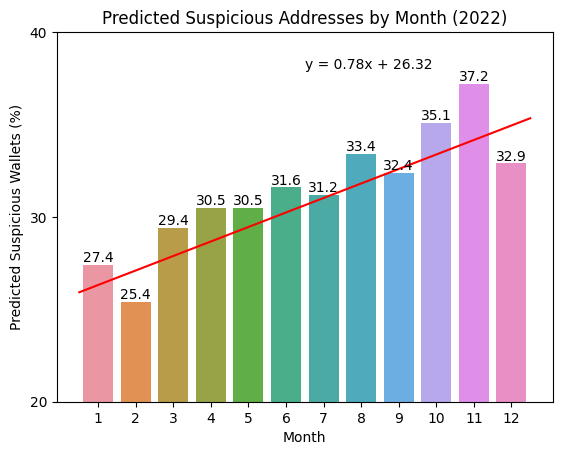

In [20]:
# Barplot
pl = sns.barplot(data=res_df, y='susp', x='month')
pl.set_title("Predicted Suspicious Addresses by Month (2022)")
pl.set_xlabel("Month")
pl.set_ylabel("Predicted Suspicious Wallets (%)")
pl.set_yticks(range(0, 101, 10))
pl.set_ylim(20, 40)

for i in pl.containers:
    pl.bar_label(i, )

# Regression Line
sns.lineplot()
slope, intercept = 0.784615385, 26.31666667
x_vals = pl.get_xlim()
y_vals = [slope * x + intercept for x in x_vals]
sns.lineplot(x=x_vals, y=y_vals, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.5, 0.9), xycoords='axes fraction')

plt.savefig("figures/add/" + "2022 Predictions" + ".pdf", format="pdf", bbox_inches="tight")
plt.show()